In [1]:
from models.tf.dataset import StockDataGenerator
from models.tf.models import LongShortTermMemory

Normalizing data...
Generating lookback features...
Scaling data...
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-03 21:12:50.961569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-03 21:12:50.961667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-03 21:12:51.508019: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-10-03 21:12:53.543683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:12:54.381765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:12:54.438134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:12:54.485881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:12:54.510283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:12:54.576497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:12:54.591725: I tensorflow/core/grappler/optimizers/cust

67/67 [==============================] - ETA: 0s - loss: 0.0877 - mse: 0.1788 - mae: 0.3125 - rmse: 0.4229
Epoch 00001: saving model to models/tf/checkpoints/model.01-0.0877.h5
67/67 [==============================] - 7s 50ms/step - loss: 0.0877 - mse: 0.1788 - mae: 0.3125 - rmse: 0.4229
Epoch 2/50
67/67 [==============================] - ETA: 0s - loss: 0.0147 - mse: 0.0297 - mae: 0.1258 - rmse: 0.1724
Epoch 00002: saving model to models/tf/checkpoints/model.02-0.0147.h5
67/67 [==============================] - 3s 44ms/step - loss: 0.0147 - mse: 0.0297 - mae: 0.1258 - rmse: 0.1724
Epoch 3/50
66/67 [============================>.] - ETA: 0s - loss: 0.0210 - mse: 0.0419 - mae: 0.1582 - rmse: 0.2048
Epoch 00003: saving model to models/tf/checkpoints/model.03-0.0209.h5
67/67 [==============================] - 3s 44ms/step - loss: 0.0209 - mse: 0.0419 - mae: 0.1582 - rmse: 0.2047
Epoch 4/50
67/67 [==============================] - ETA: 0s - loss: 0.0124 - mse: 0.0249 - mae: 0.1218 - rmse: 

2022-10-03 21:15:24.355140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:15:24.641856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:15:24.679441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:15:24.719303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:15:24.730065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:15:24.790398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-03 21:15:24.800944: I tensorflow/core/grappler/optimizers/cust

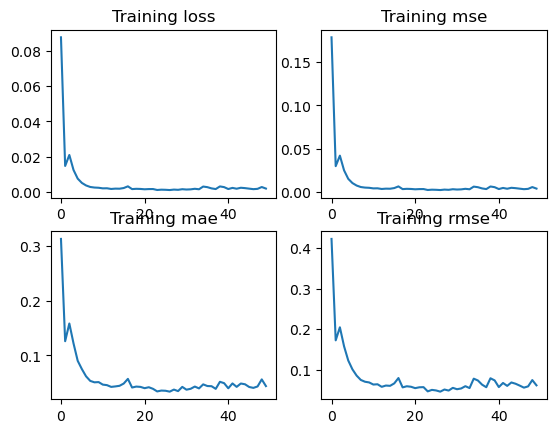

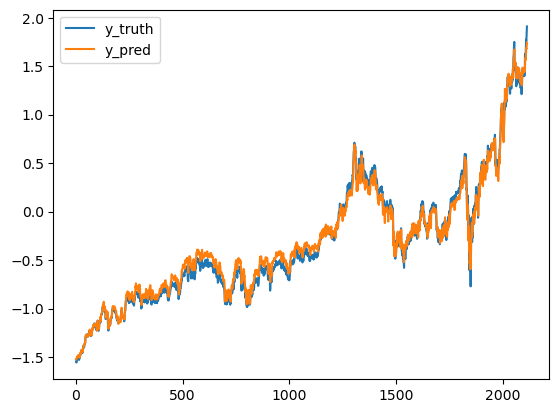

In [2]:
data = StockDataGenerator(
            'BLK', api='TDA',
            period='TEN_YEAR', period_type='YEAR', 
            frequency='DAILY', frequency_type='DAILY',
            features= { 
                'EMA': {}, '%B': {}, 'MIDPOINT': {}, 'CCI': {}, 
                'RSI': {}, 'VIX': {}
            }, verbose=1, target='close', lookback=2
)
lstm = LongShortTermMemory(target=data.target)
lstm.compile_model(data.X_train, verbose=0)
lstm.train_model(
    data.X_train, data.y_train, 
    plot_metrics=True, epochs=50, verbose=1
)

In [4]:
lstm.test_model(data.X_test, data.y_test, 1)

12/12 [==============================] - 0s 19ms/step - loss: 6.4522e-04 - mse: 0.0013 - mae: 0.0271 - rmse: 0.0359
